<a href="https://colab.research.google.com/github/RendiZein/Metode-Rekayasa-Komputasi/blob/main/RK_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necesarry library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import timedelta

# Main code

Improvement :

## Nomor 7

,t,y pred,y true,error(%),k1,k2
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000
1,0.02,4.940600,4.940596,0.000081,-3.000000,-2.940000
2,0.04,4.882376,4.882368,0.000160,-2.940600,-2.881788
3,0.06,4.825305,4.825294,0.000238,-2.882376,-2.824729
4,0.08,4.769364,4.769349,0.000314,-2.825305,-2.768799
5,0.10,4.714531,4.714512,0.000390,-2.769364,-2.713977
6,0.12,4.660783,4.660761,0.000464,-2.714531,-2.660240
7,0.14,4.608099,4.608075,0.000536,-2.660783,-2.607567
8,0.16,4.556459,4.556431,0.000608,-2.608099,-2.555937
9,0.18,4.505841,4.505811,0.000677,-2.556459,-2.505330


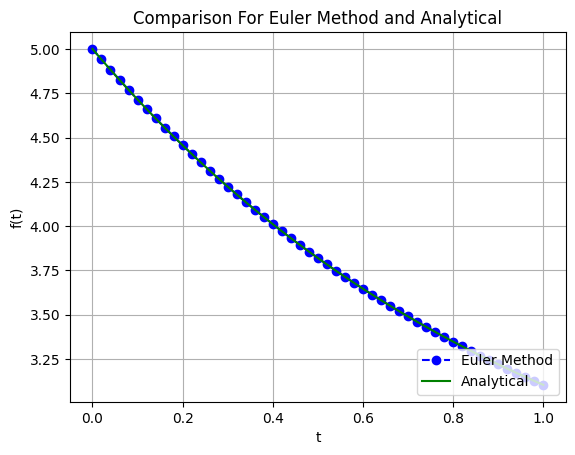

In [15]:
#defined variable
dt=0.02 #delta time
f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
H = int((1-0)/dt)  # defined variable for how much step
t=np.linspace(0, 1, H+1) #defined variable for time
k1=np.zeros(len(t))
k2=np.zeros(len(t))
y_t=np.zeros(len(t))
y_p=np.zeros(len(t))
e=np.zeros(len(t))
y_p[0]=5
y_t[0]=5
e[0]=0
k1[0]=0
k2[0]=0
# e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
#looping
for j in range(len(t)-1):
    #calculate y_true
    y_t[j+1]=f_t(t[j+1])
    #calculate y_pred
    k1[j+1]=f(t[j],y_p[j])#calculate k1
    k2[j+1]=f(t[j+1], y_p[j]+k1[j+1]*dt)#calculate k2
    y_p[j+1]=y_p[j]+(k1[j+1]+k2[j+1])*dt/2#calculate y_pred
    #calculate error
    e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
df = pd.DataFrame(list(zip(t, y_p, y_t, e,k1,k2)),
              columns =['t','y pred', 'y true', 'error(%)','k1','k2'])
display(df)
plt.plot(t, y_p, 'bo--', label='Euler Method')
plt.plot(t, y_t, 'g', label='Analytical')
plt.title('Comparison For Euler Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [5]:
delta_t=0.02
H = int((1-0)/delta_t)  # defined variable for how much step
t=np.linspace(0, 1, H+1) #defined variable for time
y_t=y_p=e=np.zeros(len(t))

In [9]:
e

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Nomor 8